In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Classic_DeepRL import DeepRLClassic
from treasure_hunt import TreasureMapEnv
from treasure_hunt_ctrm import TreasureMapCTRM
from counterfactualDeepRL import DeepRLCounterFactual
from concurrent.futures import ThreadPoolExecutor

In [2]:
probability = 1
environment = TreasureMapEnv(probability= probability)
ctrm = TreasureMapCTRM()
Gamma = 0.003
num_episodes = 500000
episode_length = 1000
UPDATE_FREQUENCY = 100
threshold = 0.85
iterations = 1
max_episodes = 500000
decay_rate = 0.01
epsilon = 1 
learnrate = 0.1
capacity = 50000
batch_size = 1500

In [3]:
# Perform value iteration to get the actual value of the objective
from value_iteration import ValueIteration
vi = ValueIteration(gamma = Gamma, environment = environment, ctrm = ctrm )
Value = vi.doVI()
print(Value)

1.0744328394276605


In [4]:
# # Define the function to execute in parallel
# def run_experiment_classic(i):
#     print("Run:", i)
#     RL_classic = DeepRLClassic(Gamma=Gamma, number_of_episodes=num_episodes, max_episode_length= episode_length, UPDATE_FREQUENCY= UPDATE_FREQUENCY, env= environment, ctrm= ctrm, decay_rate = decay_rate)
#     classic_data = RL_classic.doRLwithconvergence(Value, threshold, max_episodes = max_episodes)
#     return classic_data

# # Run the experiments in parallel
# with ThreadPoolExecutor() as executor:
#     all_runs_data_classic = list(executor.map(run_experiment_classic, range(iterations)))


In [5]:
# all_runs_data_classic = [] 
# for i in range(2):
#     print("run:",i)
#     RL_classic = DeepRLClassic(Gamma=Gamma, number_of_episodes=num_episodes, max_episode_length= episode_length, UPDATE_FREQUENCY= UPDATE_FREQUENCY, env= environment, ctrm= ctrm )
#     classic_data = RL_classic.doRL()
#     all_runs_data_classic.append(classic_data)
# average_results_classic = [0] * len(all_runs_data_classic[0])
# for i in range(len(all_runs_data_classic[0])):
#     sum_val = 0
#     for j in range(len(all_runs_data_classic)):
#         sum_val += all_runs_data_classic[j][i]
#     average_results_classic[i] = sum_val / len(all_runs_data_classic)
#     average_results_classic[i] /= Value
# print(average_results_classic)



sum = []
all_runs_data_classic = [] 
for i in range(iterations):
    print("Run:", i)
    RL_classic = DeepRLClassic(Gamma=Gamma, number_of_episodes=num_episodes, max_episode_length= episode_length, UPDATE_FREQUENCY= UPDATE_FREQUENCY, env= environment, ctrm= ctrm, epsilon= epsilon, learnrate= learnrate,  capacity = capacity, batchsize = batch_size)
    classic_data = RL_classic.doRLwithconvergence(Value, threshold, max_episodes = max_episodes)
    all_runs_data_classic.append(classic_data)

length = 0
for i in range (iterations):
    length = max(length, len(all_runs_data_classic[i]))
for sub_array in all_runs_data_classic:
    if len(sub_array) < length:
        # Extend the sub-array to reach the desired length. Use the last element if available, or 0 if empty.
        sub_array.extend([sub_array[-1]] * (length - len(sub_array)) if sub_array else [0] * length)




average_results_classic = [0] * length
print(f"Completed, Number of iterations is {len(all_runs_data_classic[0])} and the number of episodes is {len(all_runs_data_classic)}")
for i in range (iterations):
    print(f"iteration {i}: {all_runs_data_classic[i]}")
for i in range(length):
    sum_val = 0
    num_iter = 0
    for j in range(iterations):
            sum_val += all_runs_data_classic[j][i]
    average_results_classic[i] = sum_val / iterations
    average_results_classic[i] /= Value   
print(average_results_classic)

Run: 0
Episode 0 completed.
Episode 100000 completed.
Episode 200000 completed.


KeyboardInterrupt: 

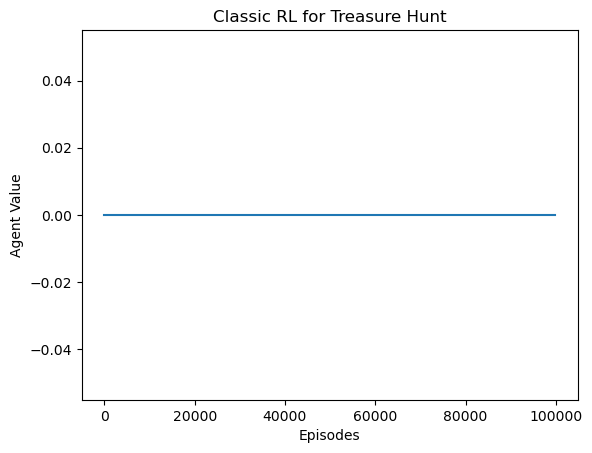

In [ ]:
plt.plot(np.arange(len(average_results_classic)) * UPDATE_FREQUENCY, average_results_classic)
plt.xlabel('Episodes')
plt.ylabel('Agent Value')
plt.title('Classic RL for Treasure Hunt')
plt.show()

In [ ]:
def run_experiment_counter(i):
    print("Run:", i)
    RL_counterfactual = DeepRLCounterFactual(Gamma=Gamma, number_of_episodes= num_episodes, max_episode_length= episode_length, UPDATE_FREQUENCY= UPDATE_FREQUENCY,  env= environment, ctrm= ctrm, decay_rate = decay_rate, epsilon= epsilon, learnrate= learnrate,  capacity = capacity, batchsize = batch_size )
    counterfactual_data = RL_counterfactual.doRLwithconvergence(Value, threshold, max_episodes = max_episodes)
    print(f"Run {i} completed")
    return counterfactual_data

# Run the experiments in parallel
with ThreadPoolExecutor() as executor:
    all_runs_data_counter = list(executor.map(run_experiment_counter, range(iterations)))

Run: 0
Run: 1
Run: 2
Run 0 completed
Run 1 completed
Run 2 completed


In [ ]:
# all_runs_data_counter = [] 
# for i in range(2):
#     RL_counterfactual = DeepRLCounterFactual(Gamma=Gamma, number_of_episodes= num_episodes, max_episode_length= episode_length, UPDATE_FREQUENCY= UPDATE_FREQUENCY,  env= environment, ctrm= ctrm )
#     counterfactual_data = RL_counterfactual.doRL()
#     all_runs_data_counter.append(counterfactual_data)
# average_results_counter = [0] * len(all_runs_data_counter[0])
# for i in range(len(all_runs_data_counter[0])):
#     sum_val = 0
#     for j in range(len(all_runs_data_counter)):
#         sum_val += all_runs_data_counter[j][i]
#     average_results_counter[i] = sum_val / len(all_runs_data_counter)
#     average_results_counter[i] /= Value
# print(average_results_counter)


# sum = []
# all_runs_data_counter = [] 
# for i in range(iterations):
#     print("Run:", i)
#     RL_counterfactual = DeepRLCounterFactual(Gamma=Gamma, number_of_episodes= num_episodes, max_episode_length= episode_length, UPDATE_FREQUENCY= UPDATE_FREQUENCY,  env= environment, ctrm= ctrm )
#     counterfactual_data = RL_counterfactual.doRLwithconvergence(Value, threshold, max_episodes = max_episodes)
#     all_runs_data_counter.append(counterfactual_data)

length = 0
for i in range (iterations):
    length = max(length, len(all_runs_data_counter[i]))
average_results_counter = [0] * length

for sub_array in all_runs_data_counter:
    if len(sub_array) < length:
        # Extend the sub-array to reach the desired length. Use the last element if available, or 0 if empty.
        sub_array.extend([sub_array[-1]] * (length - len(sub_array)) if sub_array else [0] * length)

for i in range(length):
    sum_val = 0
    num_iter = 0
    for j in range(iterations):
        if i < len(all_runs_data_counter[j]):
            num_iter += 1
            sum_val += all_runs_data_counter[j][i]
    average_results_counter[i] = sum_val / num_iter
    average_results_counter[i] /= Value
print(average_results_counter)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.016105312367187596, 0.014092148321289149, 0.012526354063368132, 0.011273718657031319, 0.010248835142755746, 0.009394765547526098, 0.008672091274639478, 0.008052656183593798, 0.007515812438020879, 0.007046074160644574, 0.006631599210018423, 0.006263177031684066, 0.005933536135279641, 0.005636859328515659, 0.005368437455729199, 0.005124417571377873, 0.004901616807404922, 0.004697382773763049, 0.004509487462812528, 0.004336045637319739, 0.004175451354456044, 0.004026328091796899, 0.0038874891920797658, 0.0037579062190104397, 0.0036366834377520385, 0.003523037080322287, 0.0034162783809185814, 0.0033157996050092115, 0.00322106247343752, 0.003131588515842033, 0.0030469509883868434, 0.0029667680676398207, 0.002890697091546492, 0.0028184296642578296, 0.0027496874773247117, 0.0026842187278645997, 0.0026217950365189117, 0.0025622087856889365, 0.0025052708126736263, 0.002450808403702461, 0.0023986635440492172, 0.0023486913868815246, 0.0023007589095982283, 0.002254

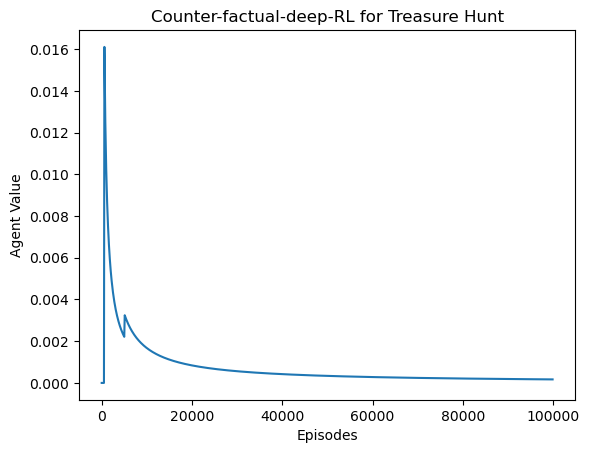

In [ ]:
plt.plot(np.arange(len(average_results_counter)) * UPDATE_FREQUENCY, average_results_counter)
plt.xlabel('Episodes')
plt.ylabel('Agent Value')
plt.title('Counter-factual-deep-RL for Treasure Hunt')
plt.show()

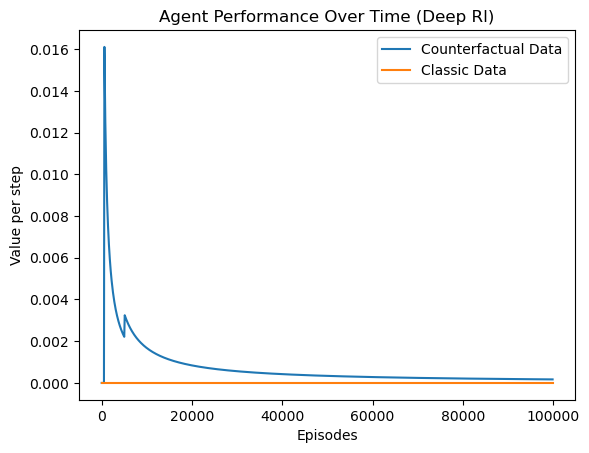

In [ ]:
plt.plot(np.arange(len(average_results_counter)) * UPDATE_FREQUENCY, average_results_counter, label='Counterfactual Data')

# Plot classic data
plt.plot(np.arange(len(average_results_classic)) * UPDATE_FREQUENCY, average_results_classic, label='Classic Data')

# Adding labels and title
plt.xlabel('Episodes')
plt.ylabel('Value per step')
plt.title('Agent Performance Over Time (Deep Rl)')

# Adding a legend to clarify which line corresponds to which dataset
plt.legend()

# Show the plot
plt.show()

In [5]:
from TabularLearning import DynamicQLearning
from TabularLearningCounterFactual import DynamicQLearningCounterFactual
# Gamma = 0.001
num_episodes = 80000
episode_length = 500
alpha = 0.5
UPDATE_FREQUENCY = 75


In [6]:
# trying to run tabular learning in parallel 

from concurrent.futures import ThreadPoolExecutor

# Define the function to execute in parallel
def run_experiment_classic(i):
    print("Run:", i)
    tabularlearning = DynamicQLearning(alpha=alpha, gamma=Gamma, UPDATE_FREQUENCY=UPDATE_FREQUENCY, environment=environment, ctrm=ctrm, decay_rate=decay_rate, epsilon= epsilon)
    tabular_data = tabularlearning.trainwithconvergence(num_episodes=num_episodes, max_episode_length=episode_length, value=Value, threshold=threshold, max_episodes=max_episodes)
    print(f"Run {i} completed")
    return tabular_data

# Run the experiments in parallel
with ThreadPoolExecutor() as executor:
    all_runs_data_classic = list(executor.map(run_experiment_classic, range(iterations)))

# all_runs_data_classic now contains the results of each parallel execution


Run: 0
Episode: 0
Episode: 1000
Episode: 2000
Episode: 3000
Episode: 4000
Episode: 5000
Episode: 6000
Episode: 7000
Episode: 8000
Episode: 9000
Episode: 10000
Episode: 11000
Episode: 12000
Episode: 13000
Episode: 14000
Episode: 15000
Episode: 16000
Episode: 17000
Episode: 18000
Episode: 19000
Episode: 20000
Episode: 21000
Episode: 22000
Episode: 23000
Episode: 24000
Episode: 25000
Episode: 26000
Episode: 27000
Episode: 28000
Episode: 29000
Episode: 30000
Episode: 31000
Episode: 32000
Episode: 33000
Episode: 34000
Episode: 35000
Episode: 36000
Episode: 37000
Episode: 38000
Episode: 39000
Episode: 40000
Episode: 41000
Episode: 42000
Episode: 43000
Episode: 44000
Episode: 45000
Episode: 46000
Episode: 47000
Episode: 48000
Episode: 49000
Episode: 50000
Episode: 51000
Episode: 52000
Episode: 53000
Episode: 54000
Episode: 55000
Episode: 56000
Episode: 57000
Episode: 58000
Episode: 59000
Episode: 60000
Episode: 61000
Episode: 62000
Episode: 63000
Episode: 64000
Episode: 65000
Episode: 66000
E

In [7]:
# all_runs_data_classic = [] 
# for i in range(2):
#     tabularlearning = DynamicQLearning(alpha = alpha, gamma = Gamma, UPDATE_FREQUENCY= UPDATE_FREQUENCY, environment= environment, ctrm = ctrm)
#     tabular_data = tabularlearning.train( num_episodes = num_episodes, max_episode_length = episode_length )    
#     all_runs_data_classic.append(tabular_data)
# average_results_classic = [0] * len(all_runs_data_classic[0])
# for i in range(len(all_runs_data_classic[0])):
#     sum_val = 0
#     for j in range(len(all_runs_data_classic)):
#         sum_val += all_runs_data_classic[j][i]
#     average_results_classic[i] = sum_val / len(all_runs_data_classic)
#     average_results_classic[i] /= Value
# print(average_results_classic)




# sum = []
# all_runs_data_classic = [] 
# for i in range(iterations):
#     print("Run:", i)
#     tabularlearning = DynamicQLearning(alpha = alpha, gamma = Gamma, UPDATE_FREQUENCY= UPDATE_FREQUENCY, environment= environment, ctrm = ctrm, decay_rate = decay_rate)
#     tabular_data = tabularlearning.trainwithconvergence( num_episodes = num_episodes, max_episode_length = episode_length, value = Value, threshold = threshold, max_episodes = max_episodes )    
#     all_runs_data_classic.append(tabular_data)


length = 0
for i in range (iterations):
    length = max(length, len(all_runs_data_classic[i]))
average_results_classic = [0] * length
for sub_array in all_runs_data_classic:
    if len(sub_array) < length:
        # Extend the sub-array to reach the desired length. Use the last element if available, or 0 if empty.
        sub_array.extend([sub_array[-1]] * (length - len(sub_array)) if sub_array else [0] * length)

for i in range(length):
    sum_val = 0
    num_iter = 0
    for j in range(iterations):
        if i < len(all_runs_data_classic[j]):
            sum_val += all_runs_data_classic[j][i]
    average_results_classic[i] = sum_val / iterations
    average_results_classic[i] /= Value
print(average_results_classic)




[0.1636163626595412, 0.16402642787492633, 0.16479709455838104, 0.1651824279001084, 0.16541362790514483, 0.16556776124183578, 0.16567785648232933, 0.16576042791269946, 0.1658246501363207, 0.1658760279152177, 0.16591806427976974, 0.16595309458356317, 0.16598273560984989, 0.16600814220380997, 0.16603016125190867, 0.16604942791899505, 0.16606642791936538, 0.1660815390308057, 0.16609505949893646, 0.1661072279202542, 0.16611823744430354, 0.1661282461025302, 0.16613738444265025, 0.16614576125442695, 0.16615346792126148, 0.16616058176757031, 0.1661671686623007, 0.1661732850645503, 0.16617897964595515, 0.1661842945885997, 0.16618926663171874, 0.16619392792214288, 0.16619830671011704, 0.16620242792232803, 0.1662063136366984, 0.1662099834780482, 0.16621345494959527, 0.16622331462964568, 0.1662326686850781, 0.1662415550377389, 0.16625000790978212, 0.16625805826410897, 0.16626573418335086, 0.16627306119717267, 0.16628006256593572, 0.16628675952736127, 0.16629317151170483, 0.1662993163300341, 0.1663

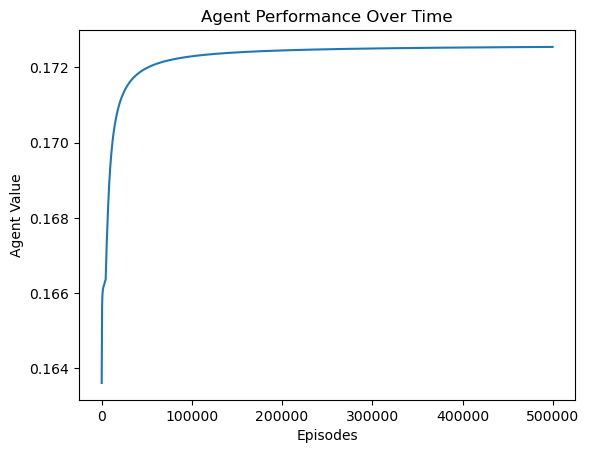

In [8]:
plt.plot(np.arange(len(average_results_classic)) * UPDATE_FREQUENCY, average_results_classic)
plt.xlabel('Episodes')
plt.ylabel('Agent Value')
plt.title('Agent Performance Over Time')
plt.show()

In [9]:
# # Define the function to execute in parallel
# def run_experiment_counter(i):
#     print("Run:", i)
#     tabularlearningcounter = DynamicQLearningCounterFactual(alpha = alpha, gamma = Gamma, UPDATE_FREQUENCY= UPDATE_FREQUENCY, environment= environment, ctrm = ctrm, decay_rate = decay_rate)
#     tabular_data_counter = tabularlearningcounter.trainwithconvergence( num_episodes = num_episodes, max_episode_length = episode_length, value = Value, threshold = threshold, max_episodes = max_episodes )
#     print(f"Run {i} completed")
#     return tabular_data_counter

# # Run the experiments in parallel
# with ThreadPoolExecutor() as executor:
#     all_runs_data_counter = list(executor.map(run_experiment_counter, range(iterations)))

In [10]:
# sum = []
# all_runs_data_counter = [] 
# for i in range(2):
#     tabularlearningcounter = DynamicQLearningCounterFactual(alpha = alpha, gamma = Gamma, UPDATE_FREQUENCY= UPDATE_FREQUENCY, environment= environment, ctrm = ctrm)
#     tabular_data_counter = tabularlearningcounter.train( num_episodes = num_episodes, max_episode_length = episode_length )
#     all_runs_data_counter.append(tabular_data_counter)
# average_results_counter = [0] * len(all_runs_data_counter[0])
# for i in range(len(all_runs_data_counter[0])):
#     sum_val = 0
#     for j in range(len(all_runs_data_counter)):
#         sum_val += all_runs_data_counter[j][i]
#     average_results_counter[i] = sum_val / len(all_runs_data_counter)
#     average_results_counter[i] /= Value
# print(average_results_counter)





sum = []
all_runs_data_counter = [] 
for i in range(iterations):
    print("Run:", i)
    tabularlearningcounter = DynamicQLearningCounterFactual(alpha = alpha, gamma = Gamma, UPDATE_FREQUENCY= UPDATE_FREQUENCY, environment= environment, ctrm = ctrm, decay_rate = decay_rate, epsilon= epsilon)
    tabular_data_counter = tabularlearningcounter.trainwithconvergence( num_episodes = num_episodes, max_episode_length = episode_length, value = Value, threshold = threshold, max_episodes = max_episodes )
    all_runs_data_counter.append(tabular_data_counter)

length = 0
for i in range (iterations):
    length = max(length, len(all_runs_data_counter[i]))
average_results_counter = [0] * length

for sub_array in all_runs_data_counter:
    if len(sub_array) < length:
        # Extend the sub-array to reach the desired length. Use the last element if available, or 0 if empty.
        sub_array.extend([sub_array[-1]] * (length - len(sub_array)) if sub_array else [0] * length)


for i in range(length):
    sum_val = 0
    num_iter = 0
    for j in range(iterations):
        if i<len(all_runs_data_counter[j]):
            sum_val += all_runs_data_counter[j][i]
    average_results_counter[i] = sum_val / iterations
    average_results_counter[i] /= Value
print(average_results_counter)

Run: 0
[0.33770462266920515, 0.33999958501341093, 0.34076457246147956, 0.3411470661855139, 0.3413765624199344, 0.3415295599095482, 0.3416388438307008, 0.3417208067715653, 0.341784555725571, 0.3421277453040668, 0.34240853677738164, 0.34264252967181064, 0.3428405236594044, 0.3430102327916276, 0.3431573140395544, 0.34328601013149035, 0.3433995655067279, 0.34350050361805023, 0.3435908166650228, 0.3436720984072981, 0.34374563903126154, 0.34381249414395554, 0.34387353576858926, 0.3439294905911701, 0.3439809690279445, 0.344028487584967, 0.34407248624887676, 0.36683601390512943, 0.3880296431023302, 0.40781036368638424, 0.4263149087488864, 0.4436629197449822, 0.45995953613525403, 0.47529752803198044, 0.48975906324889384, 0.5034171798426454, 0.5163901243700598, 0.5286802823433997, 0.5404882647547845, 0.5517058480456, 0.5623762321514976, 0.5725611988367716, 0.5822724461413351, 0.5915540548041441, 0.6004231475263837, 0.6089363324614389, 0.617087254207768, 0.6248985542146669, 0.6323910256498556, 0.

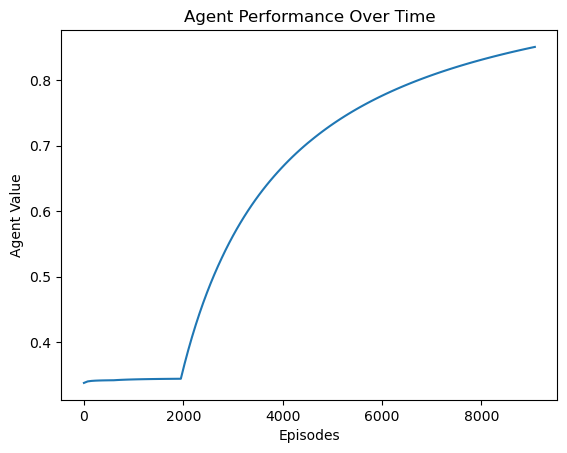

In [11]:
plt.plot(np.arange(len(average_results_counter)) * UPDATE_FREQUENCY, average_results_counter)
plt.xlabel('Episodes')
plt.ylabel('Agent Value')
plt.title('Agent Performance Over Time')
plt.show()

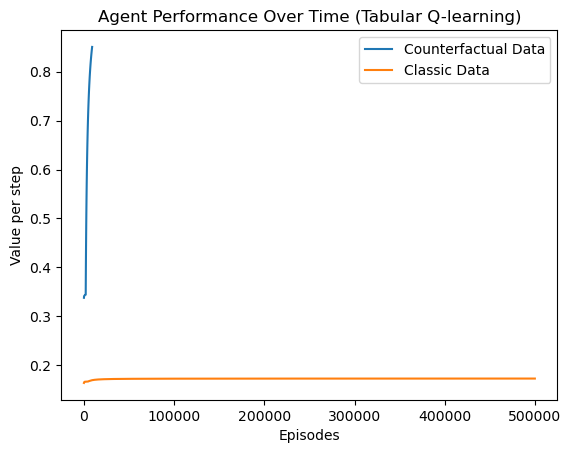

In [12]:
plt.plot(np.arange(len(average_results_counter)) * UPDATE_FREQUENCY, average_results_counter, label='Counterfactual Data')

# Plot classic data
plt.plot(np.arange(len(average_results_classic)) * UPDATE_FREQUENCY, average_results_classic, label='Classic Data')

# Adding labels and title
plt.xlabel('Episodes')
plt.ylabel('Value per step')
plt.title('Agent Performance Over Time (Tabular Q-learning)')

# Adding a legend to clarify which line corresponds to which dataset
plt.legend()

# Show the plot
plt.show()